## Earnings Per Share - WebScrapping

### Install Dependencies


In [1]:
#pip install requests==2.28.2
#pip install beautifulsoup4==4.11.2

In [7]:
#Para ANNUAL EARNINGS PER SHARE
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
ticker='AAPL'
company='apple'

# URL de la página que deseas hacer scraping
url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company}/eps-earnings-per-share-diluted"


La siguiente línea crea un diccionario en Python llamado headers, que contiene un par clave-valor. La clave es 'User-Agent' y el valor es una cadena de texto que representa el identificador del navegador. Este User-Agent en particular imita a un navegador Chrome versión 58 ejecutándose en Windows 10. Los sitios web usan el User-Agent para determinar qué tipo de dispositivo y navegador está haciendo la solicitud, lo que puede influir en cómo se entrega el contenido (por ejemplo, formato para móvil o escritorio).

In [9]:

# Definir un encabezado de agente de usuario (User-Agent) para simular una solicitud de navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}



La función get() es parte de la biblioteca requests, y se utiliza aquí para enviar la solicitud al servidor web.

In [10]:
# Realiza una solicitud GET a la URL con el encabezado de agente de usuario
response = requests.get(url, headers=headers)

https://static.semrush.com/blog/uploads/media/f5/7c/f57c8f9295d20dc481e81ae1a782c13c/ES-HTTPS-Status-Codes.png

In [23]:
# Comprueba si la solicitud fue exitosa (código de respuesta 200)
if response.status_code == 200:
    # Parsea el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encuentra la tabla de datos por su clase CSS
    table = soup.find('table', class_='historical_data_table')

    # Inicializa listas para almacenar los datos
    dates = []
    eps_In the provided code snippet, there is no explicit mention or reference to a variable named `value`. Therefore, it seems that the variable `value` is not being used or referenced in the code snippet you provided. If you have a specific context or additional information about where `value` is used or defined, please provide more details so that I can assist you further.
    values = []

    # Esta línea itera sobre cada fila (`<tr>`) de la tabla, comenzando desde el segundo elemento (índice 1) para omitir los encabezados de la tabla. 
    
    for row in table.find_all('tr')[1:]:  #`find_all('tr')` devuelve todas las filas de la tabla.
        columns = row.find_all('td')
        date = columns[0].get_text(strip=True)
        eps = columns[1].get_text(strip=True)

        #Dentro del bucle, cada fila se divide en columnas (`<td>`). `columns[0]` y `columns[1]` son las primeras dos columnas de cada fila, 
        #que contienen la fecha y el valor de EPS, respectivamente. 
        #`get_text(strip=True)` extrae el texto contenido en cada columna y elimina espacios adicionales.

        # Agrega los datos a las listas
        dates.append(date)
        eps_values.append(eps)

    # Crea un DataFrame de pandas con los datos
    data = {'Date': dates, 'EPS (Earnings Per Share)': eps_values}
    df = pd.DataFrame(data)

else:
    print("La solicitud no fue exitosa. Código de respuesta:", response.status_code)

df

,Date,EPS (Earnings Per Share)
0,2023,$6.13
1,2022,$6.11
2,2021,$5.61
3,2020,$3.28
4,2019,$2.97
5,2018,$2.98
6,2017,$2.30
7,2016,$2.08
8,2015,$2.31
9,2014,$1.61


In [24]:
df['Date'] = pd.to_datetime(df['Date'])  # Convertir la columna 'Date' a datetime



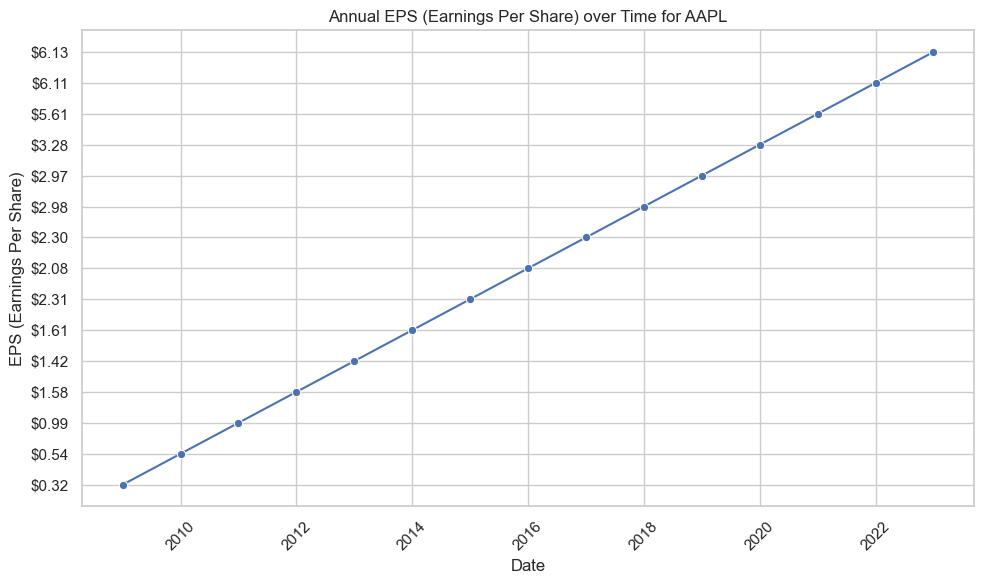

In [26]:
# Configurar Seaborn para las gráficas
sns.set_theme(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='EPS (Earnings Per Share)', data=df, marker='o')
plt.title(f'Annual EPS (Earnings Per Share) over Time for {ticker}')
plt.xlabel('Date')
plt.ylabel('EPS (Earnings Per Share)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()